
Created by : Elizabeth Mariya Jose



**TASK 02**

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data

**Dataset**

https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from scipy import stats

Reading the data and stored in Panda dataframe

In [2]:
df = pd.read_csv("/content/train.csv")

**Data Exploration**

Shows the first few rows of the data.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shows the dimensions of the DataFrame (number of rows and columns).

In [4]:
df.shape

(891, 12)

In [5]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Shows the data types of each column.

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Shows the number of missing values in each column.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Exploretory data Analysis**

Provides a summary of the DataFrame, including data types, memory usage, and non-null values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



Provides summary statistics for numerical columns (mean, standard deviation, etc.).

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print("\nFrequency table for categorical variable (Pclass):")
print(df['Pclass'].value_counts())


Frequency table for categorical variable (Pclass):
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [11]:
print("\nFrequency table for categorical variable (sex):")
print(df['Sex'].value_counts())


Frequency table for categorical variable (sex):
male      577
female    314
Name: Sex, dtype: int64


Group data and calculate statistics

In [12]:
# Grouping by 'Survived ', 'Sex ', and 'Name' columns
grouped_df = df.groupby(['Survived', 'Sex','Name' ])

# Getting descriptive statistics for 'PassengerId' column within each group
print("\nDescriptive statistics for 'PassengerId' column grouped by Country, Product, and Gross Sales:")
print(grouped_df['PassengerId'].describe())


Descriptive statistics for 'PassengerId' column grouped by Country, Product, and Gross Sales:
                                                                 count   mean  \
Survived Sex    Name                                                            
0        female Ahlin, Mrs. Johan (Johanna Persdotter Larsson)     1.0   41.0   
                Allison, Miss. Helen Loraine                       1.0  298.0   
                Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1.0  499.0   
                Andersson, Miss. Ebba Iris Alfrida                 1.0  814.0   
                Andersson, Miss. Ellis Anna Maria                  1.0  120.0   
...                                                                ...    ...   
1        male   Tornquist, Mr. William Henry                       1.0  272.0   
                Wilhelms, Mr. Charles                              1.0  674.0   
                Williams, Mr. Charles Eugene                       1.0   18.0   
              

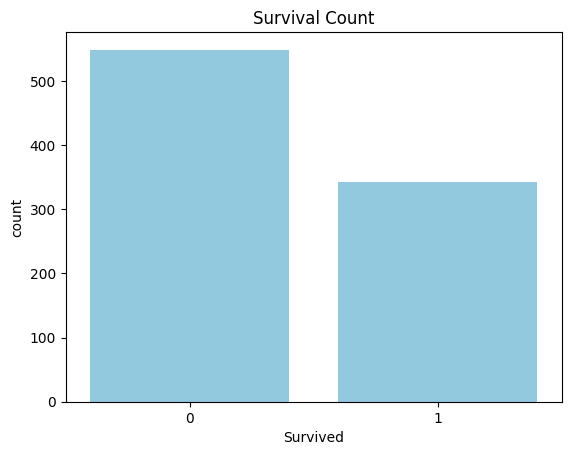

In [24]:
# Distribution of 'Survived' variable
sns.countplot(x='Survived', data=df, color='skyblue')
plt.title('Survival Count')
plt.show()


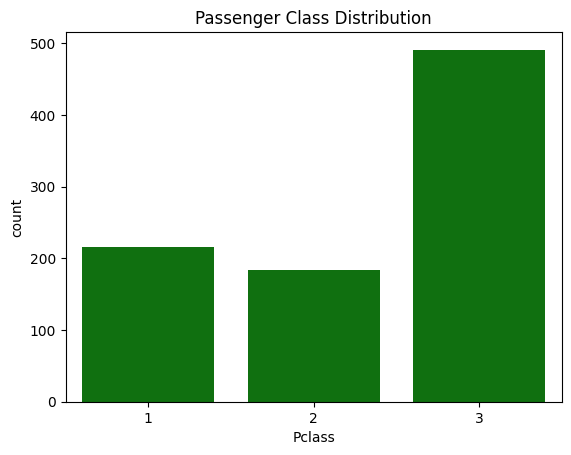

In [22]:
# Distribution of 'Pclass' variable
sns.countplot(x='Pclass', data=df, color='green')
plt.title('Passenger Class Distribution')
plt.show()

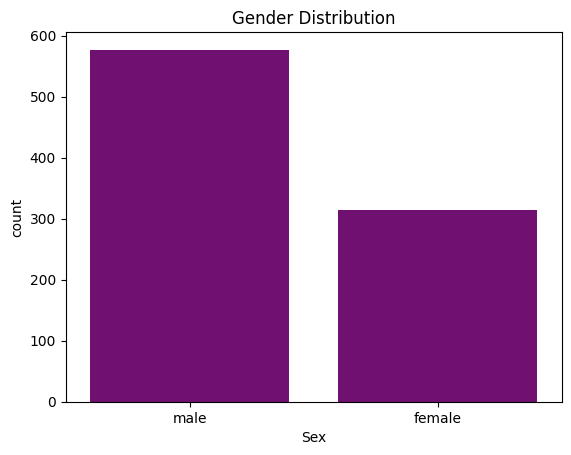

In [21]:
# Distribution of 'Sex' variable
sns.countplot(x='Sex', data=df, color='purple')
plt.title('Gender Distribution')
plt.show()

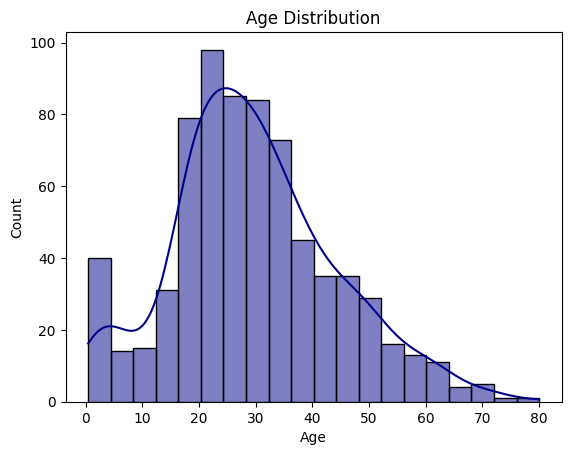

In [26]:
# Distribution of 'Age' variable
sns.histplot(df['Age'], bins=20, kde=True, color='darkblue')
plt.title('Age Distribution')
plt.show()

**Bivariate Analysis**

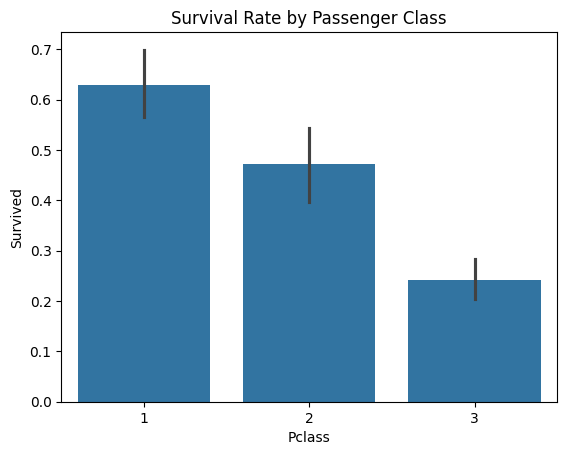

In [17]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

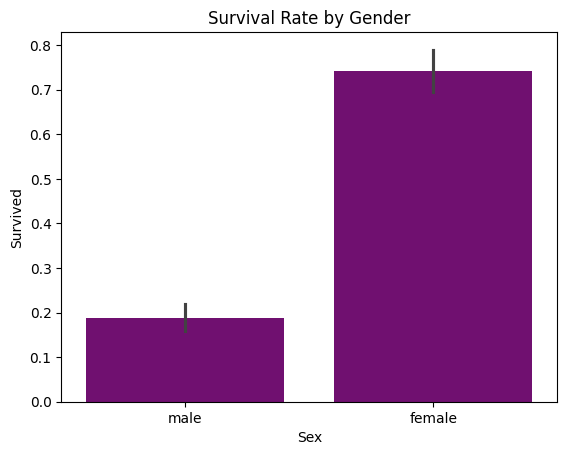

In [27]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df , color='purple')
plt.title('Survival Rate by Gender')
plt.show()

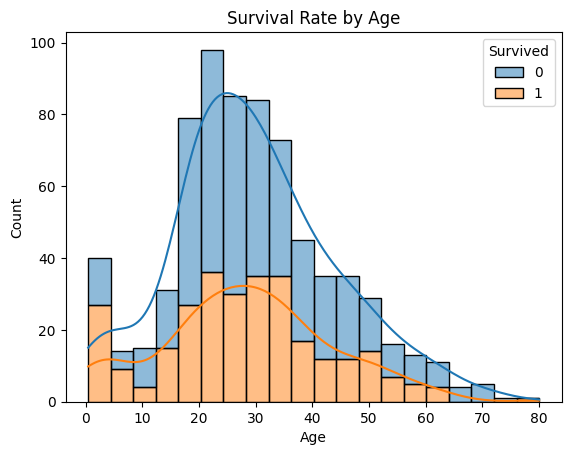

In [29]:
# Survival rate by age
sns.histplot(x='Age', hue='Survived', data=df, bins=20, kde=True, multiple='stack')
plt.title('Survival Rate by Age')
plt.show()

* We visualize the distribution of individual variables such as 'Survived', 'Pclass', 'Sex', and 'Age' using count plots and histograms. This allows us to understand the frequency or distribution of each variable separately.

* We examine relationships between variables such as 'Survived' with 'Pclass', 'Sex', and 'Age' using bar plots and histograms. This helps us identify how one variable may influence another and uncover potential patterns or trends. For example, we see survival rates based on passenger class, gender, and age.

These visualizations provide insights into the relationships between variables and help identify patterns and trends in the data, such as:

* Higher survival rates among passengers in higher classes.
* Higher survival rates among females compared to males.
* Variation in survival rates across different age groups.



**Dataset description and inferences from dataset**

* The dataset has 891 entries and 12 columns, with most columns having no missing values except for 'Age', 'Cabin', and 'Embarked'.
* The average age of the passengers is around 29.6 years, and the average fare paid is around 32.2 dollars.
* Most passengers were in the third class (500 passengers), followed by second class (216 passengers) and first class (184 passengers).
* More passengers did not survive (549 passengers) than survived (342 passengers).
* The survival rate decreases as the passenger class decreases. Specifically, the survival rate is highest for passengers in first class (0.62), followed by passengers in second class (0.47), and lowest for passengers in third class (0.25).
* The survival rate is higher for female passengers (0.74) than for male passengers (0.19).
* The survival rate is higher for passengers in younger age groups compared to older age groups. Specifically, the survival rate is highest for passengers in their 20s (0.88), followed by passengers in their 30s (0.78), and lowest for passengers in their 80s (0.17).
* The distribution of ages is slightly right-skewed, with most passengers in the age range of 20-40 years.
* The mean 'PassengerId' is highest for passengers who survived and were female, and lowest for passengers who did not survive and were male.
* The distribution of passengers by passenger class, gender, and survival status is uneven, with most passengers being in the third class, male, and not surviving.